In [2]:
from tweet_cleaning import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
data = pd.read_csv(r'D:\Academics\Project-Social Media Mining\New file\covid_latlog.csv', usecols=['created_at','text','longitude','latitude'])
#data=data.head(1000)

In [4]:
print(data.shape)
data.head()

(59461, 4)


,created_at,text,latitude,longitude
0,2020-01-26 03:55:30,RT @mkhairulazri: Although I may agree on not ...,37.983941,23.728305
1,2020-01-26 01:56:44,RT @CP24: UPDATED: Man who flew to Toronto fro...,43.653482,-79.383935
2,2020-01-25 06:47:27,RT @hrluqman: Googled bout the #Coronavirus ju...,51.447631,-2.599431
3,2020-01-24 02:55:26,@michaeljohns Nothing about #wuhan #virus on t...,47.918468,106.917702
4,2020-01-28 11:20:55,RT @DarienAlexis3: White people are really mak...,46.798562,8.231974


In [5]:
lines=data['text'].tolist()

In [6]:
# Creating a list for cleaned sentences after the preprocessing is done
train_clean_sentences = []
for line in lines:
    line = line.strip()
    # calling clean function on each tweet
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
    if(len(cleaned)==0):
        continue
    # Appending all the cleaned tweets into the list    
    train_clean_sentences.append(cleaned)
#print(train_clean_sentences)

In [7]:
# Creating a datframe from the list of cleaned tweets 
Cleaned_tweets = pd.DataFrame(train_clean_sentences, columns=['cleaned_tweets'])

In [8]:
Cleaned_tweets.head(10)

,cleaned_tweets
0,may agree total ban china tourists malaysia th...
1,updated man flew toronto china canadas first case
2,googled bout find world plague every starting ...
3,nothing front page thursday peoples daily fift...
4,white people really making jokes outbreak ance...
5,timeline jan confirmed cases jan sick jan sick...
6,spreading quite quickly throughout world pleas...
7,news american consulate plans evacuate yet pri...
8,says dulles airport one airports additional mo...
9,get disease corona virus


In [32]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# the vectorizer object will be used to transform text to vector form
#vectorizer = CountVectorizer(min_df=10, token_pattern='[a-zA-Z0-9]{3,}')
vectorizer = TfidfVectorizer(stop_words='english', min_df=10, token_pattern='[a-zA-Z0-9]{3,}')
# apply transformation
tf = vectorizer.fit_transform(Cleaned_tweets['cleaned_tweets']) #.toarray()
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()
tf.shape # --> (200000, 2296)

(59162, 5572)

In [34]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
params = {'n_components': [5,10, 15, 20]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=params)

# Do the Grid Search
model.fit(tf)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                   

In [35]:
'''from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 10
best_lda_model = LatentDirichletAllocation(n_components=number_of_topics, random_state=45, n_jobs=-1) # random state for reproducibility
#lda_output= best_lda_model.fit_transform(tf)
#data_dense = tf.todense()'''

'from sklearn.decomposition import LatentDirichletAllocation\nnumber_of_topics = 10\nbest_lda_model = LatentDirichletAllocation(n_components=number_of_topics, random_state=45, n_jobs=-1) # random state for reproducibility\n#lda_output= best_lda_model.fit_transform(tf)\n#data_dense = tf.todense()'

In [36]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

Best Model's Params:  {'n_components': 5}


In [37]:
# Create Document - Topic Matrix
#lda_output = best_lda_model.fit_transform(tf)
lda_output = best_lda_model.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(train_clean_sentences))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic.head(15)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.05,0.24,0.60,0.05,0.05,2
Doc1,0.06,0.77,0.06,0.06,0.06,1
Doc2,0.06,0.06,0.06,0.75,0.06,3
Doc3,0.05,0.63,0.23,0.05,0.05,1
Doc4,0.05,0.78,0.05,0.05,0.05,1
Doc5,0.08,0.70,0.07,0.07,0.07,1
Doc6,0.77,0.06,0.06,0.06,0.06,0
Doc7,0.06,0.06,0.06,0.06,0.75,4
Doc8,0.06,0.75,0.06,0.06,0.06,1
Doc9,0.08,0.08,0.70,0.08,0.08,2


In [38]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,12672
1,3,12351
2,4,12294
3,1,11483
4,2,10362


In [39]:
#!pip install pyLDAvis

In [40]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

#data = pyLDAvis.sklearn.prepare(sklearn_lda, sklearn_dtm, vectorizer)
panel = pyLDAvis.sklearn.prepare(best_lda_model, tf, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      -55.498764  168.788452       1        1  20.802161
4      171.597961  -45.457603       2        1  20.452041
1       21.647837 -221.920670       3        1  20.101373
0     -140.762146  -45.798565       4        1  20.086715
2      183.462219  185.824051       5        1  18.557710, topic_info=     Category        Freq           Term        Total  loglift  logprob
696   Default  668.000000          cases   668.000000  30.0000  30.0000
999   Default  416.000000      confirmed   416.000000  29.0000  29.0000
695   Default  415.000000           case   415.000000  28.0000  28.0000
4703  Default  344.000000           stay   344.000000  27.0000  27.0000
1265  Default  275.000000         deaths   275.000000  26.0000  26.0000
3033  Default  218.000000           mask   218.000000  25.0000  25.0000
4689  Default  213.000000        started   213.000000  24.0000  24.0000
2363  Default  372.000000           home   372.000000  23.0000  23.0000
5155  Default  552.000000          trump   552.000000  22.0000  22.0000
3675  Default  240.000000       positive   240.000000  21.0000  21.0000
5066  Default  167.000000          total   167.000000  20.0000  20.0000
4572  Default  255.000000         social   255.000000  19.0000  19.0000
2250  Default  165.000000          hands   165.000000  18.0000  18.0000
4121  Default  186.000000        reports   186.000000  17.0000  17.0000
1471  Default  199.000000     distancing   199.000000  16.0000  16.0000
2763  Default  162.000000          korea   162.000000  15.0000  15.0000
3277  Default  673.000000            new   673.000000  14.0000  14.0000
5242  Default  223.000000         update   223.000000  13.0000  13.0000
1264  Default  332.000000          death   332.000000  12.0000  12.0000
2668  Default  142.000000          japan   142.000000  11.0000  11.0000
4977  Default  213.000000         tested   213.000000  10.0000  10.0000
4282  Default  180.000000           safe   180.000000   9.0000   9.0000
3744  Default  295.000000      president   295.000000   8.0000   8.0000
4116  Default  168.000000       reported   168.000000   7.0000   7.0000
4309  Default  182.000000           save   182.000000   6.0000   6.0000
1001  Default  128.000000       confirms   128.000000   5.0000   5.0000
564   Default  410.000000       breaking   410.000000   4.0000   4.0000
5423  Default  122.000000           wear   122.000000   3.0000   3.0000
4610  Default  172.000000          south   172.000000   2.0000   2.0000
1641  Default  206.000000      emergency   206.000000   1.0000   1.0000
...       ...         ...            ...          ...      ...      ...
5117   Topic5  128.570603         travel   193.884014   1.2735  -5.3622
1976   Topic5  135.182191            flu   219.991835   1.1973  -5.3120
3402   Topic5   63.172492   organization    85.305238   1.3839  -6.0728
2135   Topic5  148.811129         global   260.979121   1.1225  -5.2160
2863   Topic5  133.017814           life   231.993578   1.1281  -5.3281
976    Topic5   50.144232        concern    64.868463   1.4268  -6.3037
2473   Topic5   40.595196    impeachment    49.065775   1.4948  -6.5150
2599   Topic5   63.767829  international    91.722932   1.3208  -6.0634
2328   Topic5   60.876849           high    89.901768   1.2944  -6.1098
5517   Topic5  165.631951          world   408.059415   0.7826  -5.1089
2289   Topic5  180.969624         health   551.027195   0.5708  -5.0203
5388   Topic5   62.241045            war   100.925106   1.2009  -6.0876
4178   Topic5   38.687320   restrictions    45.961733   1.5120  -6.5631
1759   Topic5   54.039979         excuse    82.805479   1.2575  -6.2289
1489   Topic5   81.934915         doctor   174.909022   0.9259  -5.8127
2625   Topic5   73.683698           iran   145.492596   1.0039  -5.9189
5339   Topic5  177.387388          virus   829.075377   0.1423  -5.0403
3413   Topic5  151.1463

In [41]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,stay,home,corona,virus,people,mask,started,lockdown,wuhan,china,safe,going,wear,time,got
Topic 1,cases,china,confirmed,case,new,wuhan,people,deaths,breaking,chinese,positive,death,update,tested,reports
Topic 2,social,china,health,virus,people,distancing,world,emergency,outbreak,save,global,corona,flu,life,travel
Topic 3,trump,china,president,pandemic,virus,outbreak,amp,like,bad,death,say,world,response,chinese,media
Topic 4,china,know,people,hands,amp,virus,need,trump,help,corona,good,outbreak,news,wash,like


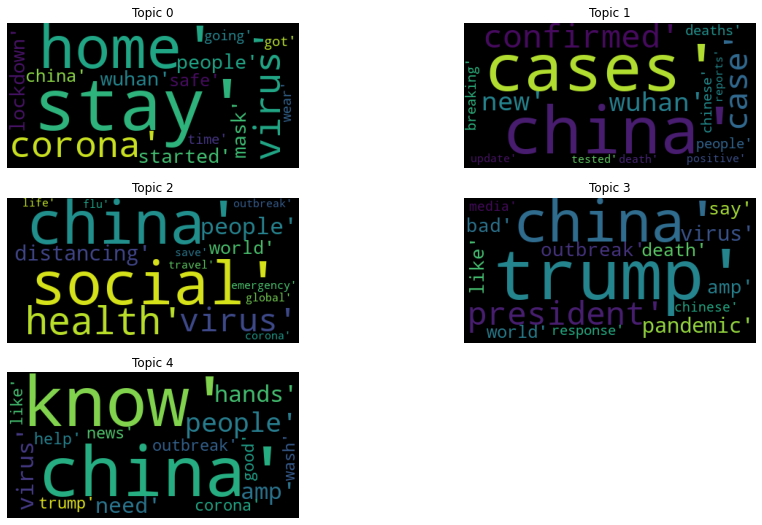

In [68]:
# Importing the word cloud to visulaize the word in each topic in form of cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words=df_topic_keywords.values.tolist()
fig, axes = plt.subplots(3, 2, figsize=(15,5))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    try:
        topic_words = str(words[i])
        cloud = WordCloud()
        cloud.generate(topic_words)
        fig.subplots_adjust(top = 1.5)
        plt.imshow(cloud)
        plt.gca().set_title('Topic ' + str(i))
        plt.gca().axis('off')
    except IndexError:
        fig.delaxes(ax)
